In [1]:
#libraries and tool importation
import numpy as np # linear algebra
import matplotlib.pylab as plt

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [5]:
#original emg data
df0_emg = pd.read_csv("/Users/dhruvaggarwal/Development/EEG-Classification/00.csv", header=None )
df1_emg = pd.read_csv("/Users/dhruvaggarwal/Development/EEG-Classification/1.csv", header=None )
df2_emg = pd.read_csv("/Users/dhruvaggarwal/Development/EEG-Classification/2.csv", header=None )
df3_emg = pd.read_csv("/Users/dhruvaggarwal/Development/EEG-Classification/3.csv", header=None )
df_emg = pd.concat([df0_emg,df1_emg,df2_emg,df3_emg], axis = 0) #concatenate the dataframe

In [6]:
df = df_emg
df.head() #print the first 5 rows of df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [7]:
x = df.loc[:,0:63]
y = df[64]

In [8]:
#check of the dimensions
print(y.shape) 
print(df.shape[0])

(11678,)
11678


In [9]:
y.unique()

array([0, 1, 2, 3])

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
#subdivision in training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [12]:
x_train = x_train.reshape(x_train.shape[0]*x_train.shape[1], 1) #m x n matrix --> column vector
x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1], 1)
#x.shape[0] = number of rows in x
#x.shape[1] = number of columns in x 

sc = StandardScaler() #select the scaler
x_train = sc.fit_transform(x_train) #fit and transform x_train
x_test = sc.transform(x_test) #transform x_test

In [13]:
x_train = x_train.reshape((-1, 8, 8))
x_test = x_test.reshape((-1, 8, 8))

print("Training set size")
print(x_train.shape)
print("Test set size")
print(x_test.shape)

Training set size
(8758, 8, 8)
Test set size
(2920, 8, 8)


In [14]:
y_train_categorical = np.eye(np.max(y_train) + 1)[y_train] #4x4 identical matrix indexed by y_train
#np.eye(np.max(y) + 1) -> 4x4 Id matrix (max(y) = 3)

In [15]:
print("Train Data size X and y")
print(x_train.shape)
print(y_train_categorical.shape)

print("Test Data size X and y")
print(x_test.shape)
print(y_test.shape)

Train Data size X and y
(8758, 8, 8)
(8758, 4)
Test Data size X and y
(2920, 8, 8)
(2920,)


In [16]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2)) #dropout rate = 20%

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 64))
model.add(Dense(units = 128))

model.add(Dense(units = 4, activation="softmax")) #4 as the output classes
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"]) #***

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 8, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [20]:
history=model.fit(x_train, y_train_categorical, epochs = 10, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)

Epoch 1/10
219/219 - 2s - loss: 0.0676 - accuracy: 0.9774 - val_loss: 0.1298 - val_accuracy: 0.9720 - 2s/epoch - 8ms/step
Epoch 2/10
219/219 - 2s - loss: 0.0717 - accuracy: 0.9769 - val_loss: 0.1201 - val_accuracy: 0.9715 - 2s/epoch - 8ms/step
Epoch 3/10
219/219 - 2s - loss: 0.0651 - accuracy: 0.9786 - val_loss: 0.1257 - val_accuracy: 0.9640 - 2s/epoch - 8ms/step
Epoch 4/10
219/219 - 2s - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.1447 - val_accuracy: 0.9606 - 2s/epoch - 8ms/step
Epoch 5/10
219/219 - 2s - loss: 0.0563 - accuracy: 0.9803 - val_loss: 0.1166 - val_accuracy: 0.9703 - 2s/epoch - 8ms/step
Epoch 6/10
219/219 - 2s - loss: 0.0565 - accuracy: 0.9814 - val_loss: 0.1475 - val_accuracy: 0.9669 - 2s/epoch - 8ms/step
Epoch 7/10
219/219 - 2s - loss: 0.0505 - accuracy: 0.9823 - val_loss: 0.1234 - val_accuracy: 0.9697 - 2s/epoch - 8ms/step
Epoch 8/10
219/219 - 2s - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0945 - val_accuracy: 0.9737 - 2s/epoch - 8ms/step
Epoch 9/10
219/219 - 2s 

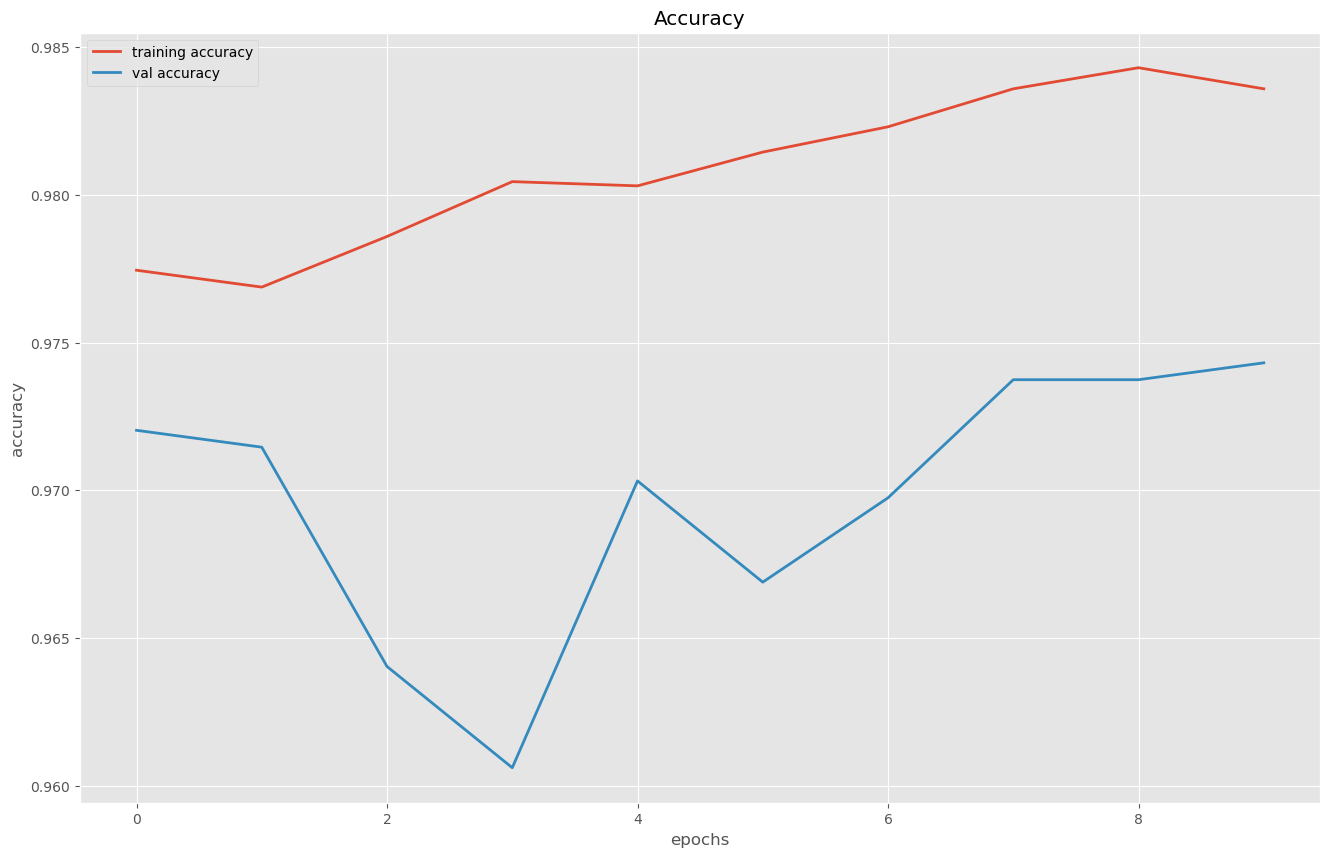

In [21]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

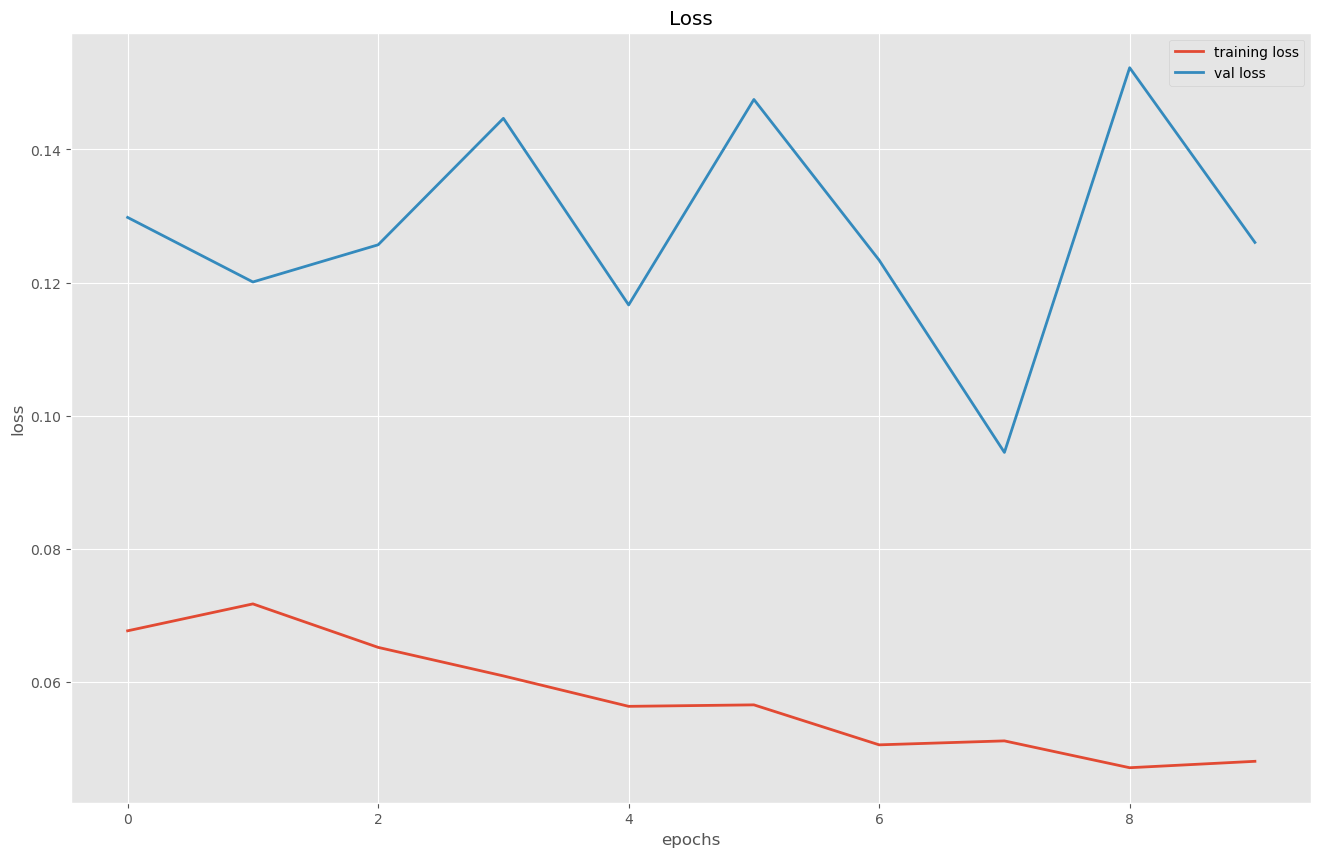

In [23]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()